수동

In [4]:
import pandas as pd
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv", encoding = 'euc-kr')
Car_raw.head()


,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


In [5]:
Car_raw = Car_raw.drop(["Name","Model"], axis = 1, inplace = False)
Car_raw

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Kilometer_Range_Grade
0,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,4
1,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,5
2,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,4
3,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
4,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,5
7071,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,6
7072,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,4
7073,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,5


In [9]:
# 범주형 변수의 Dummy 변수화
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Car_raw_train, Car_raw_test = train_test_split(Car_raw_dummy, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(Car_raw_train.shape))
print("test data size: {}".format(Car_raw_test.shape))

print(Car_raw_train.isnull().sum())

train data size: (4952, 58)
test data size: (2123, 58)
Price                        0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Kilometer_Range_Grade        0
Location_Ahmedabad           0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_CNG                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Automatic       0
Transmission_Manual          0
Owner_Type_First             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_AMBASSADOR             0
Brand_AUDI     

In [18]:
reg_model = smf.ols(formula = "Price ~ Year+ Kilometers_Driven + Mileage + Engine + Power + Seats + Transmission_Automatic + Transmission_Manual", data = Car_raw_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1316.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:24:09   Log-Likelihood:                -52692.
No. Observations:                4952   AIC:                         1.054e+05
Df Residuals:                    4944   BIC:                         1.055e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -1.8

마일리지 값과 seats의 p_value 값이 유의확률 0.05보다 큼

In [19]:
Car_raw_train_x = Car_raw_train.drop('Price', axis=1)

Car_raw_train_x_const = add_constant(Car_raw_train_x)

df_vif = pd.DataFrame()
df_vif["variable"] = Car_raw_train_x_const.columns 
df_vif["VIF"] = [variance_inflation_factor(Car_raw_train_x_const.values, i) for i in range(Car_raw_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variable,VIF
0,const,0.00
1,Year,2.15
6,Seats,2.51
2,Kilometers_Driven,3.49
3,Mileage,3.91
7,Kilometer_Range_Grade,4.25
5,Power,9.88
4,Engine,10.90
42,Brand_JEEP,inf
41,Brand_JAGUAR,inf


다중공산성을 확인한 결과, POWER, ENGINE이 설명변수 간의 다중공산성이 의심되므로, 모델에서 제외 검토

범주형 설명변수 제외한 후, 연속형 설명변수만으로 고려하여 다중선형회귀 실시 

In [24]:
reg_model = smf.ols(formula = "Price ~ Year+ Kilometers_Driven + Mileage + Engine + Power + Seats", data = Car_raw_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:31:19   Log-Likelihood:                -52755.
No. Observations:                4952   AIC:                         1.055e+05
Df Residuals:                    4945   BIC:                         1.056e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.927e+06   1.13e+0

마일리지의 경우 P-VALUE가 0.05 이상이므로 제거 

In [25]:
# 마일리지 변수 제거 
reg_model = smf.ols(formula = "Price ~ Kilometers_Driven + Year + Seats + Power + Engine", data = Car_raw_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1773.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:32:56   Log-Likelihood:                -52755.
No. Observations:                4952   AIC:                         1.055e+05
Df Residuals:                    4946   BIC:                         1.056e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.951e+06   1.05e+0

등분산성 검정

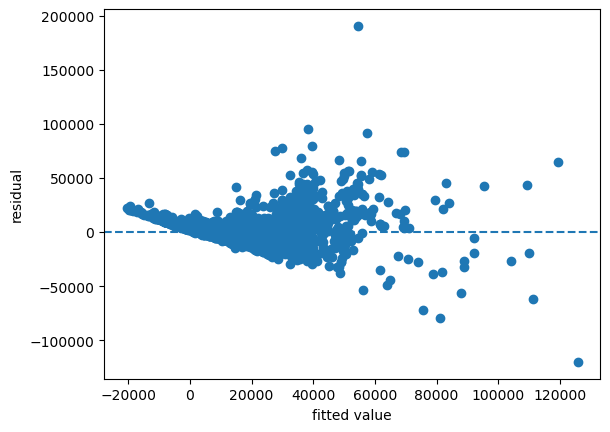

In [26]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

등분산성 미충족 

정규성 검정 

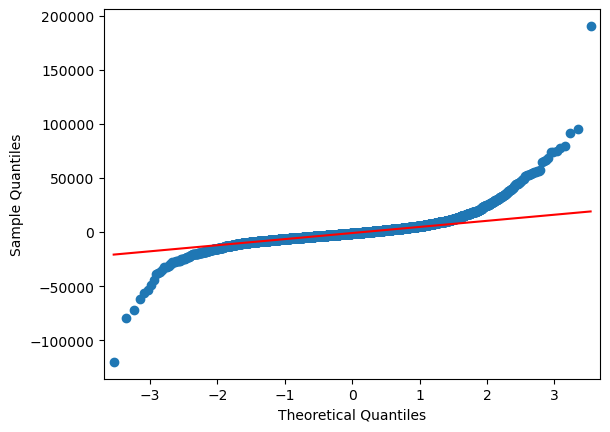

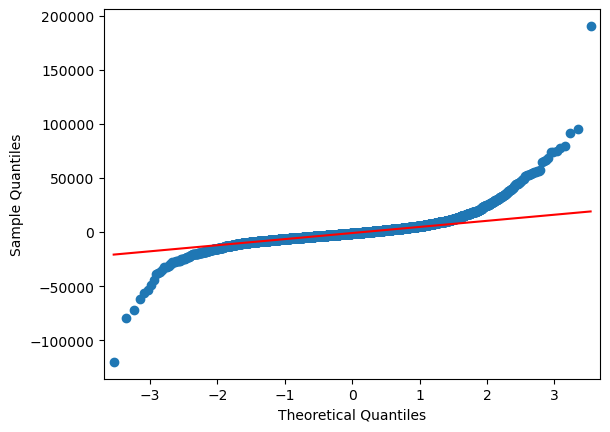

In [27]:
qqplot(reg_result.resid, line = "q")

정규성 미충족

따라서, 설명변수에 로버스트 스케일러 변환 적용 

In [29]:
from sklearn.preprocessing import RobustScaler
import matplotlib
%matplotlib inline

columns_to_keep = ["Year", "Kilometers_Driven","Mileage", "Engine", "Power", "Seats"]
Car_raw_dummy_x_selected = Car_raw_dummy[columns_to_keep]
Car_raw_scale_robust = RobustScaler().fit_transform(Car_raw_dummy[columns_to_keep])
Car_raw_scale_robust = pd.DataFrame(Car_raw_scale_robust, columns=columns_to_keep)

Car_raw_dummy_y_selected = pd.DataFrame(Car_raw_dummy["Price"])


Car_raw_converted = Car_raw_dummy_y_selected.join(Car_raw_scale_robust)
Car_raw_converted

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,2069.50,-2.75,0.690678,-0.965517,-0.005195,-0.923370,0.0
1,26918.78,0.00,0.793103,0.341379,0.616883,0.782167,0.0
2,25293.84,0.00,0.672030,0.341379,0.616883,0.782167,0.0
3,29509.48,0.50,-0.844086,0.341379,0.616883,0.782167,0.0
4,28972.94,0.50,-0.358130,0.341379,0.616883,0.782167,0.0
...,...,...,...,...,...,...,...
7070,26336.25,0.00,0.867825,-1.241379,1.177922,1.924480,0.0
7071,36147.20,0.00,1.253479,-1.258621,1.177922,1.686498,2.0
7072,16847.23,0.50,0.434872,-1.258621,1.177922,1.686498,2.0
7073,36254.50,0.00,0.926788,-1.258621,1.177922,1.686498,2.0


In [30]:
Car_raw_train, Car_raw_test = train_test_split(Car_raw_converted, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(Car_raw_train.shape))
print("test data size: {}".format(Car_raw_test.shape))

Car_raw_train

train data size: (4952, 7)
test data size: (2123, 7)


,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
5584,12646.92,0.00,0.434872,0.105172,-0.041558,0.234016,0.0
2236,8431.28,0.50,-0.889133,0.086207,-0.384416,-0.185626,0.0
4689,10654.07,0.50,0.070245,0.775862,-0.318182,-0.312550,0.0
1214,6898.32,0.25,-0.127903,1.275862,0.006494,0.077741,0.0
3120,6361.78,0.00,-1.036018,0.120690,-0.384416,-0.185626,0.0
...,...,...,...,...,...,...,...
664,15130.32,1.00,-0.023713,-0.017241,0.646753,0.859908,0.0
3276,12263.68,0.75,-0.325412,-0.327586,0.000000,-0.376011,2.0
1318,3832.40,0.00,-0.076742,0.172414,-0.383117,-0.109472,0.0
723,2452.74,-1.25,-0.225110,-0.068966,-0.646753,-0.502935,0.0


In [31]:
reg_model2 = smf.ols(formula = "Price ~ Kilometers_Driven + Year + Seats + Power + Engine", data = Car_raw_train)
reg_result2 = reg_model2.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1773.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:34:09   Log-Likelihood:                -52755.
No. Observations:                4952   AIC:                         1.055e+05
Df Residuals:                    4946   BIC:                         1.056e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.951e+06   1.05e+0

로버스트 스케일 변환 후 잔차 등분산성 검정

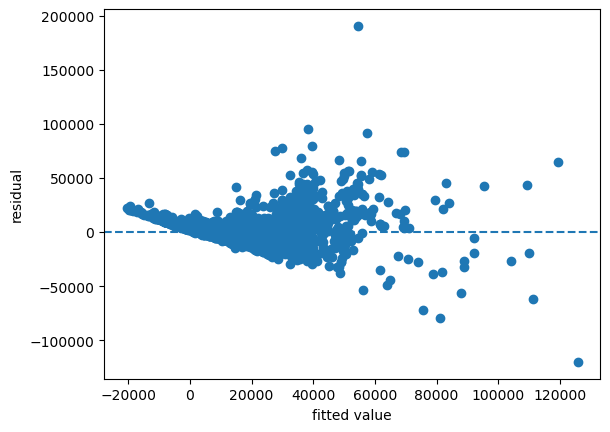

In [34]:
plt.scatter(reg_result2.fittedvalues, reg_result2.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

정규성 미충족

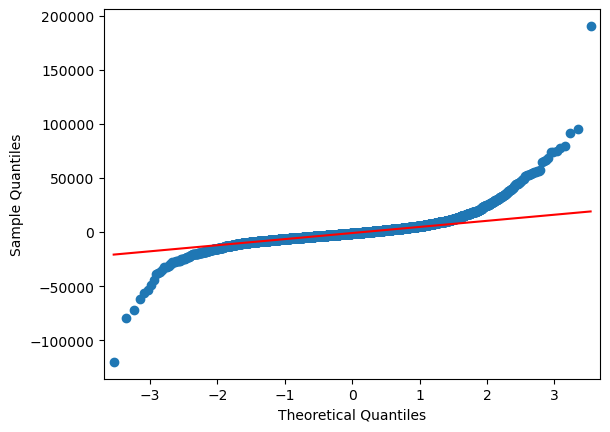

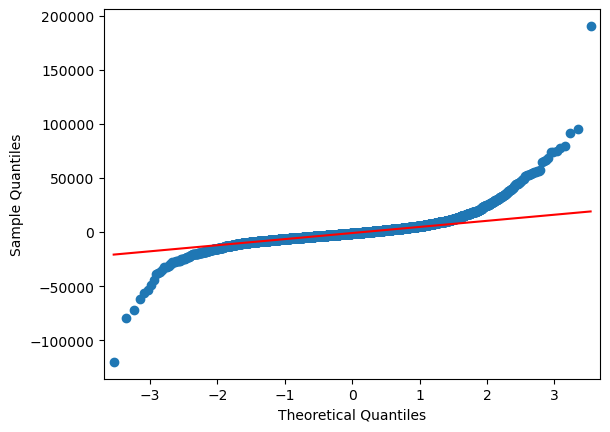

In [35]:
qqplot(reg_result.resid, line = "q")

정규성 미충족

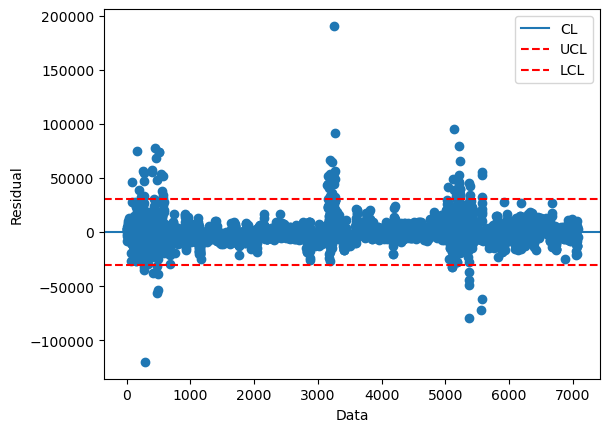

In [37]:
plt.scatter(Car_raw_train.index, reg_result.resid)
plt.xlabel("Data") ; plt.ylabel("Residual")
plt.axhline(y=0, linestyle = "-", label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle = "--",color="red",label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle = "dashed",color="red",label='LCL')
plt.legend()

회귀모델의 성능

In [38]:
train_pred = reg_result2.predict(Car_raw_train)
test_pred = reg_result2.predict(Car_raw_test)

print("train data의 결정계수:", r2_score(Car_raw_train['Price'], train_pred))
print("test data의 결정계수:", r2_score(Car_raw_test['Price'], test_pred))

train data의 결정계수: 0.6419072903738767
test data의 결정계수: 0.6551519589378294


train data의 결정계수는 64.1%, test data의 결정계수는 65.5%

LinearRegression모델을 통한 자동 변수 선택 

LinearRegression모델에서의 후진제거법을 이용한 변수 선택

In [39]:
Car_raw_train_y = Car_raw_train["Price"]
Car_raw_train_x = Car_raw_train.drop('Price', axis=1)
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 4).fit(Car_raw_train_x, Car_raw_train_y)
selected_cols = Car_raw_train_x.columns[rfe.support_]
removed_cols = Car_raw_train_x.columns[~rfe.support_]

print("selected variable: {}".format(selected_cols))
print("removed variable: {}".format(removed_cols))

selected variable: Index(['Year', 'Kilometers_Driven', 'Engine', 'Power'], dtype='object')
removed variable: Index(['Mileage', 'Seats'], dtype='object')


In [40]:
rfe_reg_model = smf.ols(formula = "Price ~ Kilometers_Driven + Year + Power + Engine", data = Car_raw_train)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2207.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:37:39   Log-Likelihood:                -52762.
No. Observations:                4952   AIC:                         1.055e+05
Df Residuals:                    4947   BIC:                         1.056e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.103e+04    160.28

모델을 통하여 64.1%를 설명할 수 있음 

후진제거법을 이용하여 분석한 결과, 모델의 설명력 64.1%로 나옴 

변수 중요도

<Axes: >

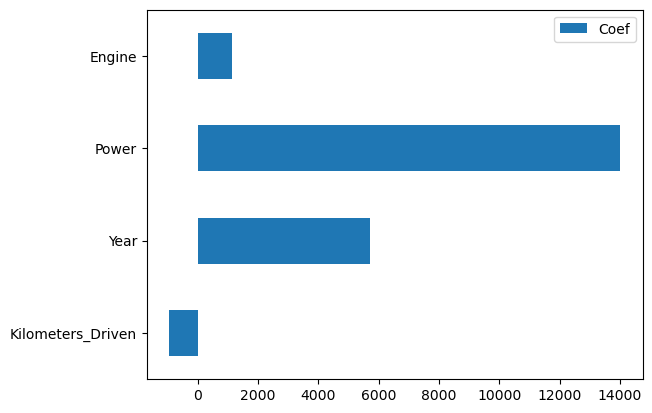

In [42]:
Car_raw_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, 
                                index=['Kilometers_Driven', 'Year', 'Power', 'Engine'])

# 수평 막대 그래프 그리기
Car_raw_reg_coef.plot.barh(y="Coef")